<a href="https://colab.research.google.com/github/abdullahalmohit/RNAseq-With-Python/blob/main/Gene_Set_Enrichment_Analysis%20with%20gprofiler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Data Preparation, load annotated DEseq from DEA analysis

In [50]:
df = pd.read_csv('/content/DESeq2_results_T_vs_C_annotated.csv').dropna()
df = df.rename(columns = {'Symbol': 'Gene'})

In [51]:
df

,Geneid,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Gene,Description
0,AT1G01010,2783.409773,0.904959,0.116650,7.757910,8.634049e-15,7.203149e-14,NAC001,NAC domain containing protein 1 [Source:NCBI g...
1,AT1G01020,2982.724194,0.437000,0.189795,2.302478,2.130821e-02,4.121231e-02,ARV1,ARV1 family protein [Source:NCBI gene (formerl...
2,AT1G01030,89.240373,0.408271,0.253054,1.613375,1.066631e-01,1.673376e-01,NGA3,AP2/B3-like transcriptional factor family prot...
3,AT1G01040,2262.951462,-0.587789,0.100755,-5.833864,5.415823e-09,2.826062e-08,DCL1,dicer-like 1 [Source:NCBI gene (formerly Entre...
4,AT1G01046,16.149035,-1.005451,0.571428,-1.759540,7.848588e-02,1.290246e-01,ath-MIR838,ath-MIR838 [Source:miRBase;Acc:MI0005394]
...,...,...,...,...,...,...,...,...,...
27365,AT5G67600,17265.176792,1.956396,0.193561,10.107378,5.123711e-24,7.698072e-23,WIH1,cysteine-rich TM module stress tolerance prote...
27366,AT5G67610,1938.263024,0.327128,0.115330,2.836467,4.561573e-03,1.036210e-02,AT5G67610,transmembrane protein (DUF2215) [Source:NCBI g...
27367,AT5G67620,1305.623526,-1.459157,0.163689,-8.914178,4.914496e-19,5.519193e-18,AT5G67620,DUF4228 domain protein [Source:NCBI gene (form...
27368,AT5G67630,2565.535088,0.065068,0.116319,0.559398,5.758900e-01,6.704053e-01,AT5G67630,P-loop containing nucleoside triphosphate hydr...


In [52]:
df = df.drop(columns= 'Description')

In [53]:
df

,Geneid,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Gene
0,AT1G01010,2783.409773,0.904959,0.116650,7.757910,8.634049e-15,7.203149e-14,NAC001
1,AT1G01020,2982.724194,0.437000,0.189795,2.302478,2.130821e-02,4.121231e-02,ARV1
2,AT1G01030,89.240373,0.408271,0.253054,1.613375,1.066631e-01,1.673376e-01,NGA3
3,AT1G01040,2262.951462,-0.587789,0.100755,-5.833864,5.415823e-09,2.826062e-08,DCL1
4,AT1G01046,16.149035,-1.005451,0.571428,-1.759540,7.848588e-02,1.290246e-01,ath-MIR838
...,...,...,...,...,...,...,...,...
27365,AT5G67600,17265.176792,1.956396,0.193561,10.107378,5.123711e-24,7.698072e-23,WIH1
27366,AT5G67610,1938.263024,0.327128,0.115330,2.836467,4.561573e-03,1.036210e-02,AT5G67610
27367,AT5G67620,1305.623526,-1.459157,0.163689,-8.914178,4.914496e-19,5.519193e-18,AT5G67620
27368,AT5G67630,2565.535088,0.065068,0.116319,0.559398,5.758900e-01,6.704053e-01,AT5G67630


Ranking of genes

In [54]:
df['Rank'] = -np.log10(df.padj)*df.log2FoldChange

df = df.sort_values('Rank', ascending = False).reset_index(drop = True)

df

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Geneid,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Gene,Rank
0,AT3G15670,12370.735742,9.218518,0.210769,43.737529,0.000000e+00,0.000000e+00,AT3G15670,inf
1,AT5G06760,24237.548165,7.856435,0.195181,40.251970,0.000000e+00,0.000000e+00,LEA4-5,inf
2,AT5G52300,10239.269607,8.464562,0.188816,44.829676,0.000000e+00,0.000000e+00,LTI65,inf
3,AT1G52690,32143.745842,8.725479,0.211339,41.286669,0.000000e+00,0.000000e+00,LEA7,inf
4,AT2G47770,6231.121662,8.337546,0.230843,36.117877,1.188747e-285,2.528033e-282,TSPO,2347.829713
...,...,...,...,...,...,...,...,...,...
21506,AT1G13420,7325.602762,-4.255109,0.124369,-34.213527,1.521661e-256,2.327540e-253,ST4B,-1074.981464
21507,AT2G45180,3331.219314,-6.342608,0.206506,-30.713925,3.709751e-207,3.099364e-204,AT2G45180,-1290.776069
21508,AT5G53250,11173.758610,-5.918747,0.160964,-36.770635,5.442075e-296,1.414516e-292,AGP22,-1727.382727
21509,AT4G14130,5594.441877,-5.496272,0.134128,-40.977876,0.000000e+00,0.000000e+00,XTH15,-inf


In [55]:
ranking = df[['Gene', 'Rank']]
ranking

,Gene,Rank
0,AT3G15670,inf
1,LEA4-5,inf
2,LTI65,inf
3,LEA7,inf
4,TSPO,2347.829713
...,...,...
21506,ST4B,-1074.981464
21507,AT2G45180,-1290.776069
21508,AGP22,-1727.382727
21509,XTH15,-inf


Cleaning the dataset

In [58]:
ranking_clean = ranking.replace([float('inf'), float('-inf')], pd.NA).dropna()

In [59]:
ordered_genes = (
    ranking_clean.sort_values("Rank", ascending=False)["Gene"]
    .tolist()
)

GSEA

In [57]:
!pip install gprofiler-official

In [61]:
from gprofiler import GProfiler

In [62]:
gp = GProfiler(return_dataframe=True)

gsea_results = gp.profile(
    organism='athaliana',
    query=ordered_genes,
    ordered=True,
    no_evidences=False,
    sources=['GO:BP', 'GO:MF', 'GO:CC', 'KEGG']
)

In [63]:
gsea_results.head(20)

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents,intersections,evidences
0,GO:BP,GO:0042221,response to chemical,5.290231e-51,True,"""Any process that results in a change in state...",2940,1467,412,21925,0.280845,0.140136,query_1,[GO:0050896],"[TSPO, AT3G02480, AT3G17520, ADH1, LTI78, AT4G...","[[IEP], [IEP], [IEP], [IMP, IEP, HEP], [IEP, I..."
1,GO:BP,GO:0009628,response to abiotic stimulus,8.451702e-48,True,"""Any process that results in a change in state...",2131,1709,363,21925,0.212405,0.170343,query_1,[GO:0050896],"[TSPO, AT3G02480, AT3G17520, ADH1, LTI78, NCED...","[[IEP], [IEP], [IEP], [IDA, IMP, IGI, IEP, HEP..."
2,GO:BP,GO:0050896,response to stimulus,6.150648e-35,True,"""Any process that results in a change in state...",6001,1719,706,21925,0.410704,0.117647,query_1,[GO:0008150],"[TSPO, AT3G02480, AT3G17520, ADH1, LTI78, AT4G...","[[IEP], [IEP], [IEP], [IDA, IMP, IGI, IEP, HEP..."
3,GO:BP,GO:1901700,response to oxygen-containing compound,3.481114e-31,True,"""Any process that results in a change in state...",1659,651,146,21925,0.224270,0.088005,query_1,[GO:0042221],"[TSPO, AT3G02480, AT3G17520, ADH1, LTI78, NCED...","[[IEP], [IEP], [IEP], [IEP], [IEP, IEA], [IMP]..."
4,GO:BP,GO:0006950,response to stress,1.199467e-30,True,"""Any process that results in a change in state...",3733,669,241,21925,0.360239,0.064559,query_1,[GO:0050896],"[TSPO, AT3G02480, AT3G17520, ADH1, LTI78, AT4G...","[[IEP], [IEP], [IEP], [IDA, IMP, IGI, IEP, HEP..."
5,GO:BP,GO:0071456,cellular response to hypoxia,2.427751e-30,True,"""Any process that results in a change in state...",239,1574,80,21925,0.050826,0.334728,query_1,"[GO:0001666, GO:0033554, GO:0036294]","[ADH1, SUS1, STZ, AT5G35735, BCB, TCH3, SRC2, ...","[[IMP, HEP], [HEP], [HEP], [HEP], [HEP], [HEP]..."
6,GO:BP,GO:0036294,cellular response to decreased oxygen levels,4.736039e-30,True,"""Any process that results in a change in state...",241,1574,80,21925,0.050826,0.331950,query_1,"[GO:0036293, GO:0071453]","[ADH1, SUS1, STZ, AT5G35735, BCB, TCH3, SRC2, ...","[[IMP, HEP], [HEP], [HEP], [HEP], [HEP], [HEP]..."
7,GO:BP,GO:0071453,cellular response to oxygen levels,4.736039e-30,True,"""Any process that results in a change in state...",241,1574,80,21925,0.050826,0.331950,query_1,"[GO:0070482, GO:0070887]","[ADH1, SUS1, STZ, AT5G35735, BCB, TCH3, SRC2, ...","[[IMP, HEP], [HEP], [HEP], [HEP], [HEP], [HEP]..."
8,GO:BP,GO:0009415,response to water,1.866612e-28,True,"""Any process that results in a change in state...",436,1709,113,21925,0.066121,0.259174,query_1,"[GO:0001101, GO:0009628, GO:1901700]","[AT3G02480, AT3G17520, ADH1, LTI78, NCED3, SUS...","[[IEP], [IEP], [IEP], [IEP], [IMP], [IEP], [IM..."
9,GO:BP,GO:0001666,response to hypoxia,2.979559e-28,True,"""Any process that results in a change in state...",266,1574,82,21925,0.052097,0.308271,query_1,"[GO:0006950, GO:0036293]","[ADH1, SUS1, STZ, AT5G35735, BCB, TCH3, SRC2, ...","[[IDA, IMP, IEP, HEP], [IEP, HEP], [HEP], [HEP..."


In [64]:
gsea_results.to_csv("gprofiler_gsea_results.csv", index=False)

Visualization

In [77]:
!pip install plotnine

In [78]:
from plotnine import *

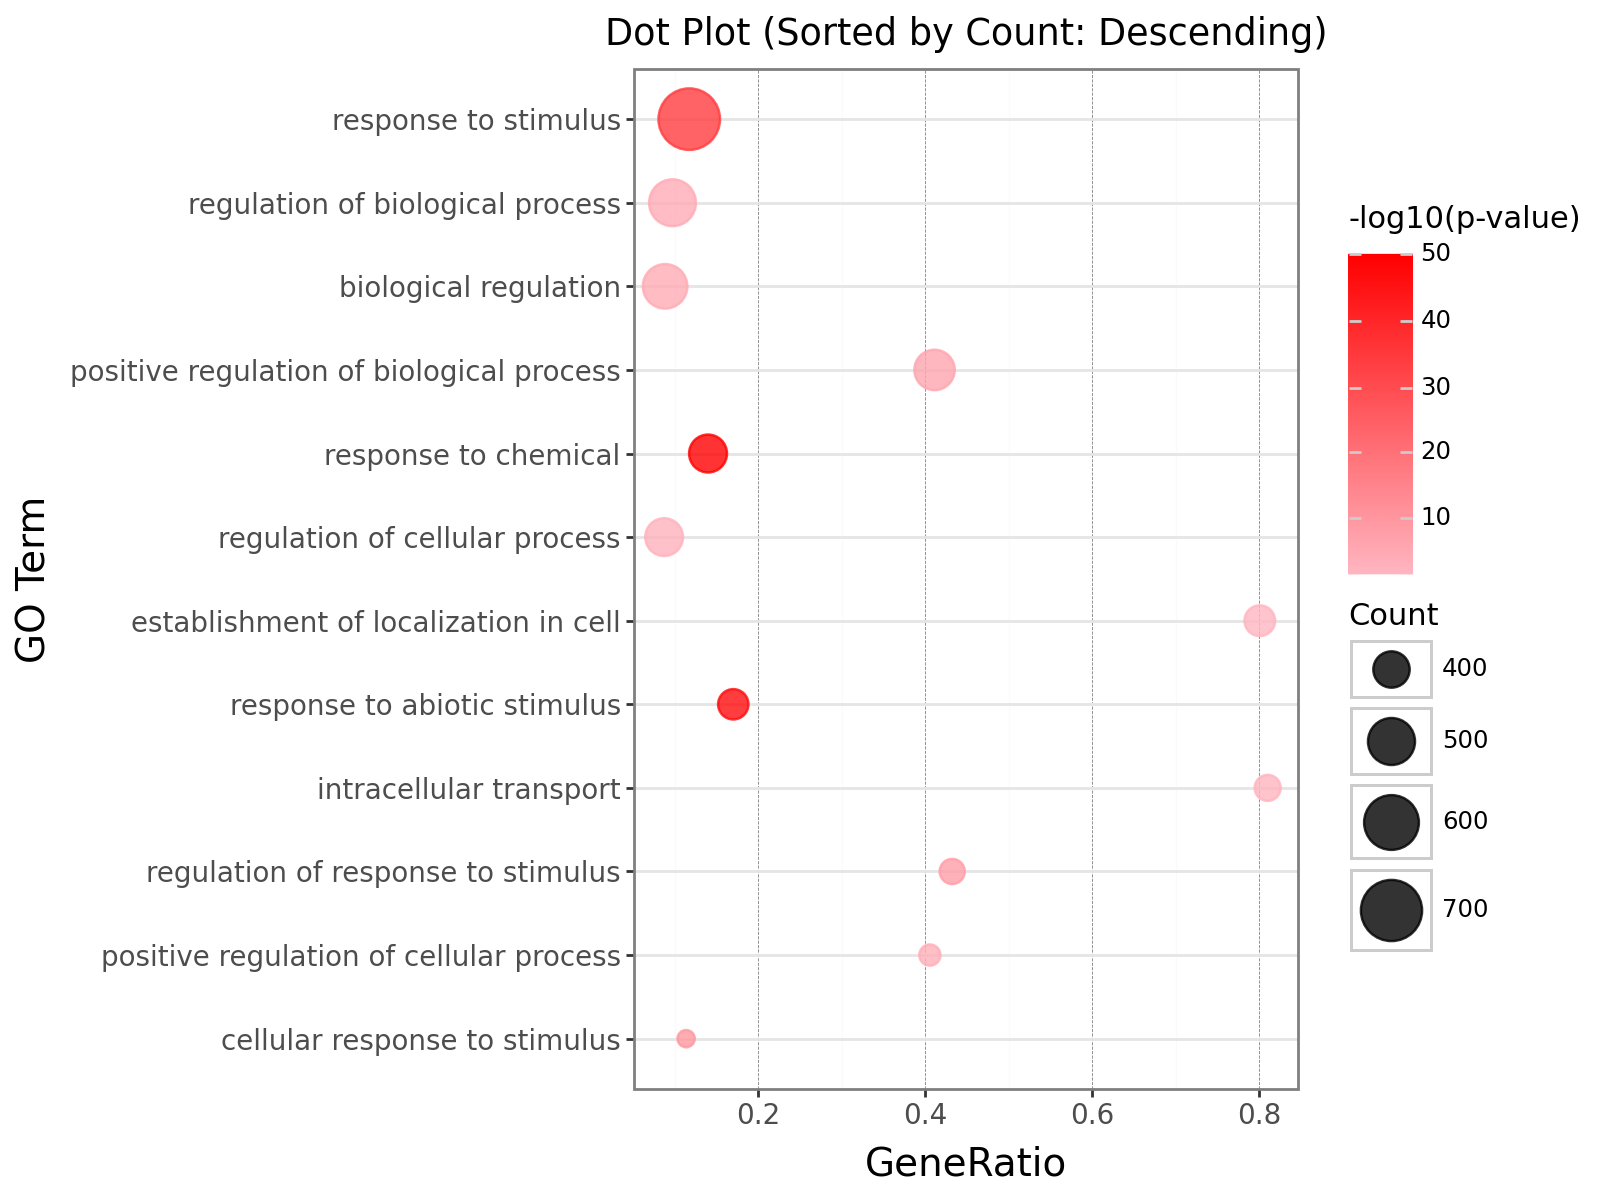

In [83]:
df = gsea_results.copy()
df["GeneRatio"] = df["intersection_size"] / df["term_size"]
df["neglog10"] = -np.log10(df["p_value"])

# Sort by Count (intersection_size) descending
df = df.sort_values("intersection_size", ascending=False).head(12)

(
    ggplot(df, aes("GeneRatio", "reorder(name, intersection_size)"))  # sort by count
    + geom_point(
        aes(size="intersection_size", color="neglog10"),
        alpha=0.8
    )
    + scale_color_gradient(low="lightpink", high="red")
    + scale_size(range=[3, 12])
    + theme_bw()
    + theme(
        figure_size=(8, 6),
        axis_title=element_text(size=14),
        axis_text=element_text(size=10),
        panel_grid_major_x=element_line(color="gray", linetype="dashed", size=0.3)
    )
    + labs(
        x="GeneRatio",
        y="GO Term",
        color="-log10(p-value)",
        size="Count",
        title="Dot Plot (Sorted by Count: Descending)"
    )
)

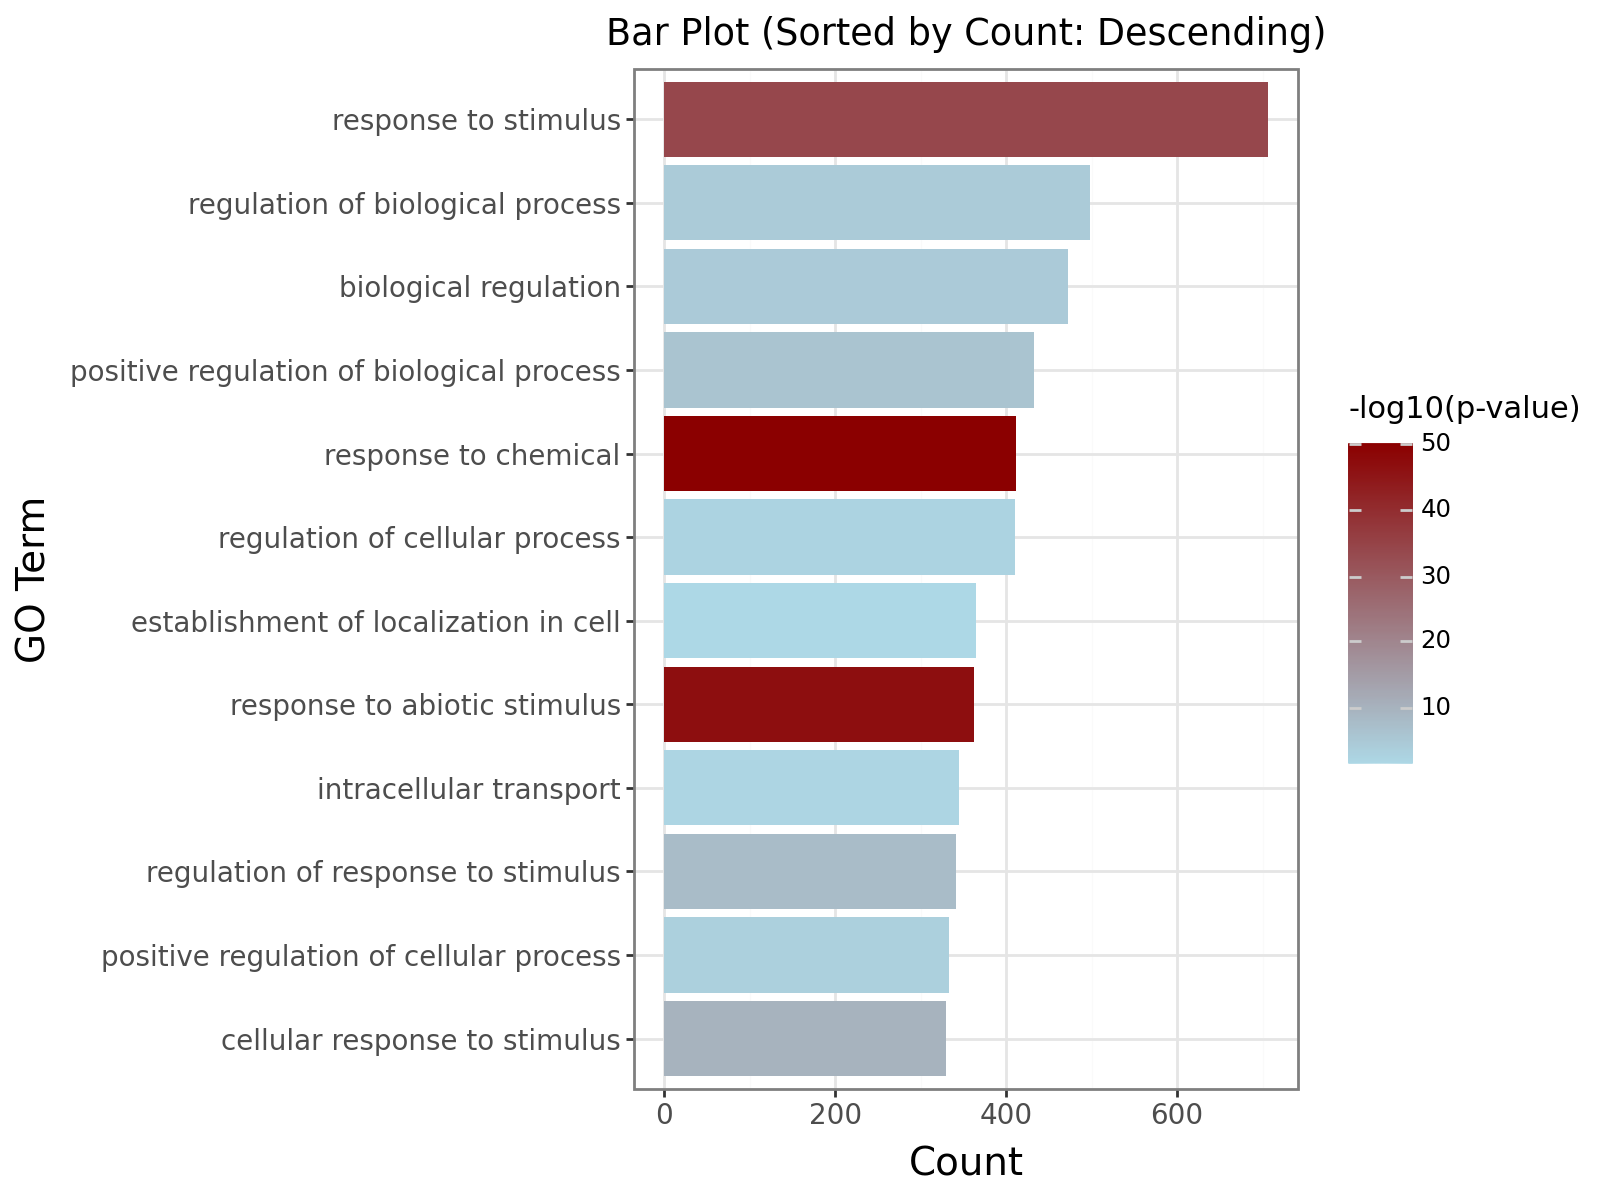

In [84]:
(
    ggplot(df, aes("reorder(name, intersection_size)", "intersection_size", fill="neglog10"))
    + geom_col()
    + coord_flip()
    + scale_fill_gradient(low="lightblue", high="darkred")
    + theme_bw()
    + theme(
        figure_size=(8, 6),
        axis_title=element_text(size=14),
        axis_text=element_text(size=10),
    )
    + labs(
        x="GO Term",
        y="Count",
        fill="-log10(p-value)",
        title="Bar Plot (Sorted by Count: Descending)"
    )
)

EMAP from gprofiler

Data Preparation

In [87]:
import ast

In [101]:
top20 = gsea_results.sort_values("p_value").head(20).copy()
top20["neglog10_p"] = -np.log10(top20["p_value"])

In [102]:
df = top20.copy()

# Convert gene list strings → list
df["intersections"] = df["intersections"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

# Add −log10 p-value
df["neglog10_p"] = -np.log10(df["p_value"])

Compute Gene-Set Similarity (Jaccard Index)

In [103]:
import itertools

def jaccard(a, b):
    a, b = set(a), set(b)
    if len(a.union(b)) == 0:
        return 0
    return len(a.intersection(b)) / len(a.union(b))

edges = []

# Compute pairwise similarity
for i, j in itertools.combinations(df.index, 2):
    sim = jaccard(df.loc[i, "intersections"], df.loc[j, "intersections"])
    if sim >= 0.2:   # threshold (adjustable)
        edges.append((i, j, sim))

Build graph using networkx

In [104]:
import networkx as nx

In [105]:
G = nx.Graph()

# Add nodes
for idx, row in df.iterrows():
    G.add_node(
        idx,
        label=row["name"],
        size=row["intersection_size"],
        color=row["neglog10_p"]
    )

# Add similarity edges
for i, j, sim in edges:
    G.add_edge(i, j, weight=sim)

Plot EMAP (Network Plot)

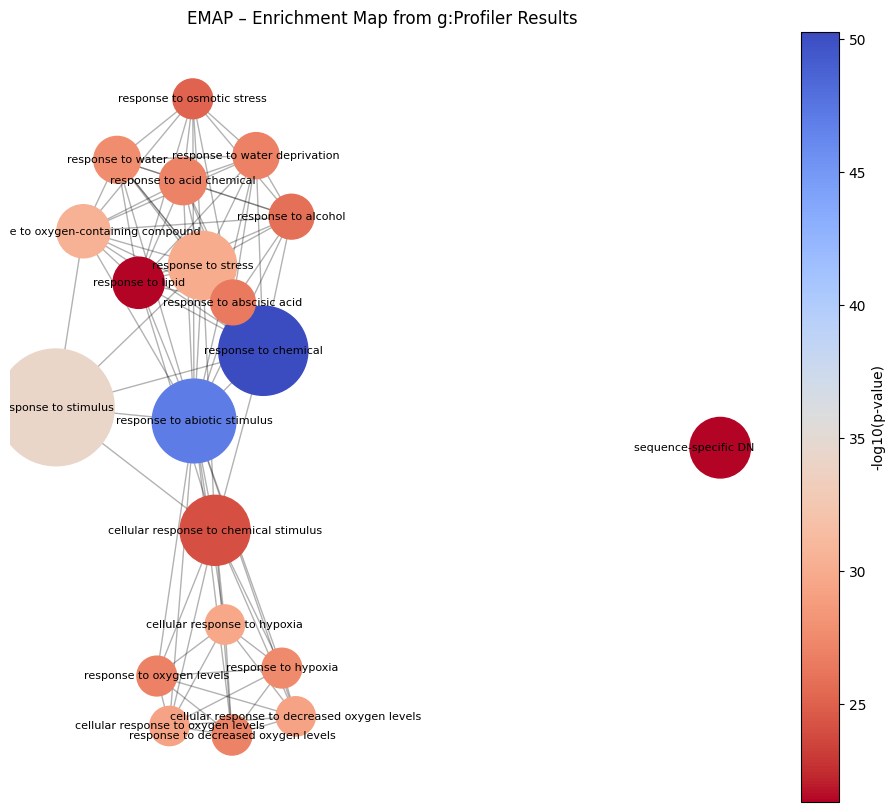

In [106]:
plt.figure(figsize=(12, 10))

# Graph layout (force-directed)
pos = nx.spring_layout(G, k=0.7, seed=42)

# Node sizes
sizes = [G.nodes[n]["size"] * 10 for n in G.nodes]

# Node colors
colors = [G.nodes[n]["color"] for n in G.nodes]

# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.3)

# Draw nodes
nodes = nx.draw_networkx_nodes(
    G,
    pos,
    node_size=sizes,
    node_color=colors,
    cmap="coolwarm_r"
)

# Draw labels (optional)
nx.draw_networkx_labels(
    G,
    pos,
    labels={n: G.nodes[n]["label"] for n in G.nodes},
    font_size=8
)

plt.colorbar(nodes, label="-log10(p-value)")
plt.title("EMAP – Enrichment Map from g:Profiler Results")
plt.axis("off")
plt.show()
